# Random Forest

Random forest o bosque aleatorio es un modelo de ensemble que mejora el rendimiento de predicción combinando muchos árboles de decisión.

Funciona construyendo múltiples árboles de decisión en subconjuntos aleatorios de los datos, y luego promediando sus predicciones para reducir la varianza y evitar el sobreajuste.

Al agregar una medida de aleatoriedad, los árboles son más independientes y diversos.

Random forest puede usarse tanto para regresión como clasificación y es capaz de capturar relaciones no lineales e interacciones complejas.

Tiene pocos hiperparámetros para ajustar y normalmente no requiere mucho preprocessing de datos. Es uno de los modelos de machine learning más versátiles y poderosos.

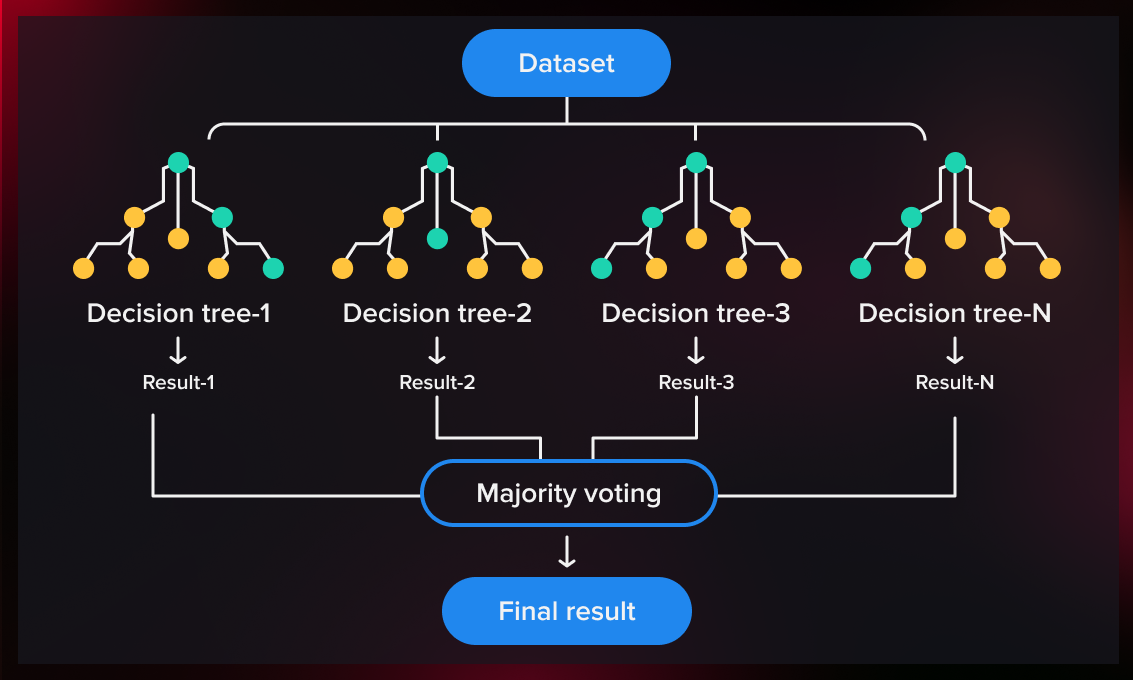

# 2) Clasificacion
## Ejemplo 2.1.1:

https://data.world/health/breast-cancer-wisconsin
https://archive.ics.uci.edu/dataset/16/breast+cancer+wisconsin+prognostic

##Dataset "Breast Cancer Wisconsin (Diagnostic)": Randon Forest

El algoritmo Random Forest es una técnica de ensamble que combina múltiples árboles de decisión para mejorar la precisión y reducir el sobreajuste.

Para utilizar Random Forest con el dataset, puedes seguir los siguientes pasos:

1 Cargar el conjunto de datos Breast Cancer Wisconsin (Diagnostic)".

2 Imputar los valores faltantes con la media de cada columna, si es necesario.

3 Dividir el conjunto de datos en conjuntos de entrenamiento y prueba.

4 Crear el clasificador Random Forest y entrenarlo con los datos de entrenamiento.

5 Realizar predicciones en el conjunto de prueba.

6 Calcular la tasa de aciertos para evaluar el rendimiento del model

In [1]:
# Cargando modulos necesarios
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
from sklearn.model_selection import train_test_split
from sklearn.ensemble import RandomForestClassifier
from sklearn.metrics import accuracy_score
from sklearn.impute import SimpleImputer

In [2]:
# Cargar el conjunto de datos Breast Cancer Wisconsin
url="https://raw.githubusercontent.com/Rafael-Ernesto-Perez/machine_learning/master/UNNE/2023/datasets/breast-cancer-wisconsin-data_data.csv"
data = pd.read_csv(url)

# Mostrar información general del conjunto de datos
print("Información general del conjunto de datos:")
print(data.info())

Información general del conjunto de datos:
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 569 entries, 0 to 568
Data columns (total 33 columns):
 #   Column                   Non-Null Count  Dtype  
---  ------                   --------------  -----  
 0   id                       569 non-null    int64  
 1   diagnosis                569 non-null    object 
 2   radius_mean              569 non-null    float64
 3   texture_mean             569 non-null    float64
 4   perimeter_mean           569 non-null    float64
 5   area_mean                569 non-null    float64
 6   smoothness_mean          569 non-null    float64
 7   compactness_mean         569 non-null    float64
 8   concavity_mean           569 non-null    float64
 9   concave points_mean      569 non-null    float64
 10  symmetry_mean            569 non-null    float64
 11  fractal_dimension_mean   569 non-null    float64
 12  radius_se                569 non-null    float64
 13  texture_se               569 non-null

In [3]:
# Definir la variable objetivo y las características (variables predictoras)
y = data["diagnosis"]
X = data.drop(["diagnosis", "id", "Unnamed: 32"], axis=1)  # Eliminar columnas no deseadas

# Imputar los valores faltantes con la media de cada columna
imputer = SimpleImputer(strategy="mean")
X_imputed = imputer.fit_transform(X)

In [4]:
# Dividir el conjunto de datos en conjuntos de entrenamiento y prueba
X_train, X_test, y_train, y_test = train_test_split(X_imputed, y, random_state=27)

In [5]:
# Crear el clasificador Random Forest y entrenarlo con los datos de entrenamiento
random_forest = RandomForestClassifier()
random_forest.fit(X_train, y_train)

# Realizar predicciones en el conjunto de prueba
predichos = random_forest.predict(X_test)

# Calcular la tasa de aciertos
tasa_aciertos = accuracy_score(y_test, predichos)
print("Aciertos:", tasa_aciertos)
print("Aciertos %:", tasa_aciertos*100)

Aciertos: 0.972027972027972
Aciertos %: 97.2027972027972


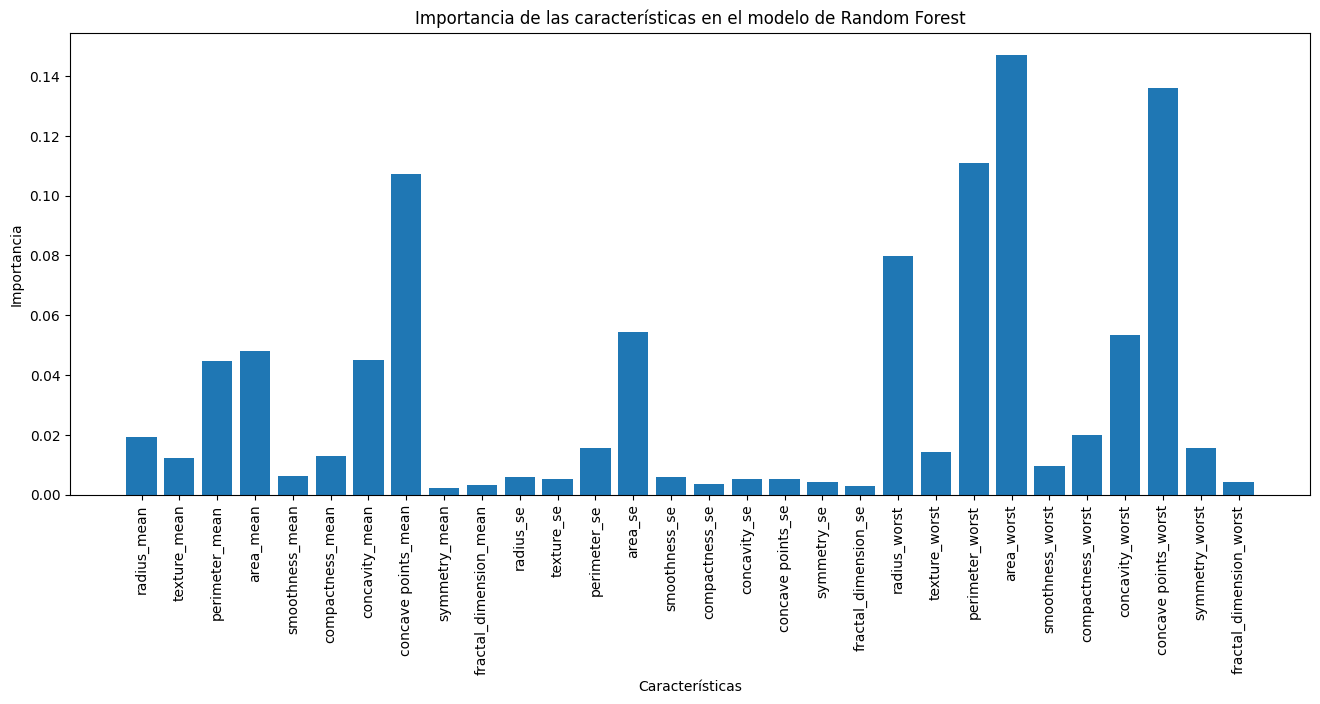

In [12]:
# Visualizar la importancia de las características en un gráfico de barras
importances = random_forest.feature_importances_

plt.figure(figsize=(16, 6))
plt.bar(X.columns, importances)
plt.xlabel('Características')
plt.ylabel('Importancia')
plt.title('Importancia de las características en el modelo de Random Forest')
plt.xticks(rotation=90)
plt.show()


In [7]:
# Crear un DataFrame para mostrar la comparación entre los valores reales y predichos
comparacion_df = pd.DataFrame({'Valor Real': y_test.values[:10], 'Valor Predicho': predichos[:10]})

print("\nTabla de comparación entre Valor Real y Valor Predicho:")
print(comparacion_df)



Tabla de comparación entre Valor Real y Valor Predicho:
  Valor Real Valor Predicho
0          B              B
1          B              B
2          M              M
3          M              M
4          B              B
5          B              B
6          M              M
7          B              B
8          B              M
9          M              M


### <font color='red'> PRACTICA 1 </font>

## ¿Se obtuvieron resultados similares a los obtenidos con arboles de decisión?
## ¿Cual tuvo mejor desempeño?
## ¿Qué características del dataset fueron las más relevantes para la formación de los arboles?

### <font color='red'> PRACTICA 2 </font>

#*Modifique* el set de datos para trabajar con 70 % del total para entrenamiento.

## ¿Cuantas columnas y filas tiene el dataset ?
## Visualizar las primeras 10 lineas del dataset en la siguiente casilla
## ¿Mejoran los resultados mediante la modificación de ccp alpha?
## ¿Cual es el ccp alpha óptimo?


### <font color='red'> PRACTICA 3 </font>

# Modifique el set de datos para trabajar con 70 % del total para entrenamiento.

# ¿Si realizamos random forest con este dataset ? ¿Mejorará la performance ?
# Si mejora, ¿De cuanto es la mejora?
# ¿A que se debe la mejoría o no de los resltados?
